In [2]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline
from typing import List
import pandas as pd

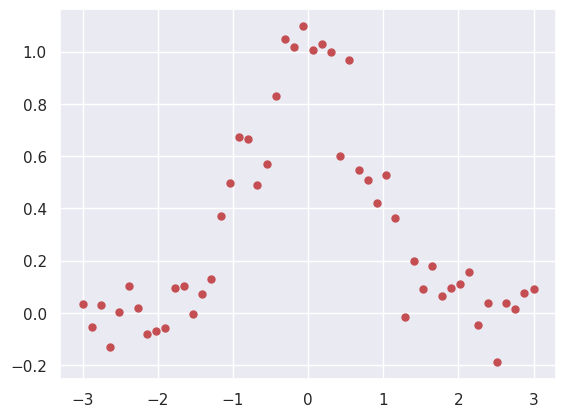

In [48]:
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)

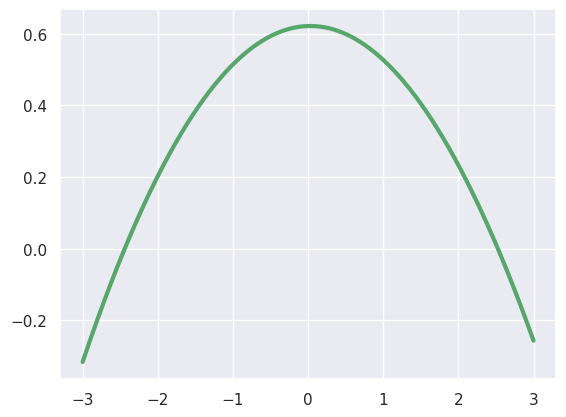

In [49]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

In [50]:
def spline(x: List[float], y: List[float], smoothing_factor: float=None):
    spl = UnivariateSpline(x, y)
    if smoothing_factor is not None:
        spl.set_smoothing_factor(smoothing_factor)
    xs = np.linspace(-3, 3, 1000)
    return spl

spl = spline(x, y, 0.5)
ys = spl(xs)

1.8420831904877755

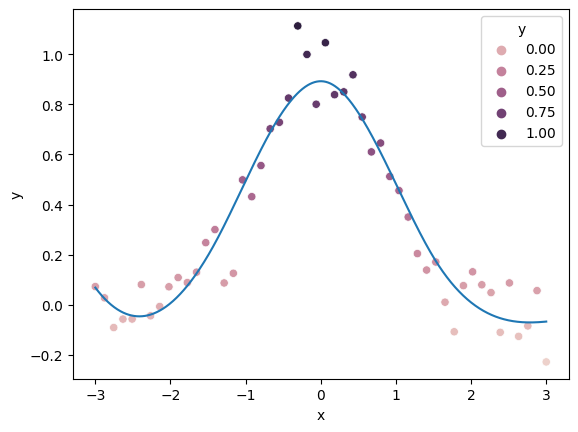

In [9]:
sns.lineplot(data=pd.DataFrame({"x": xs, "y": ys}), x="x", y="y")
sns.scatterplot(data=pd.DataFrame({"x": x, "y": y}), x="x", y="y", hue="y")
spl.integral(-3, 3)

7494.281326522665

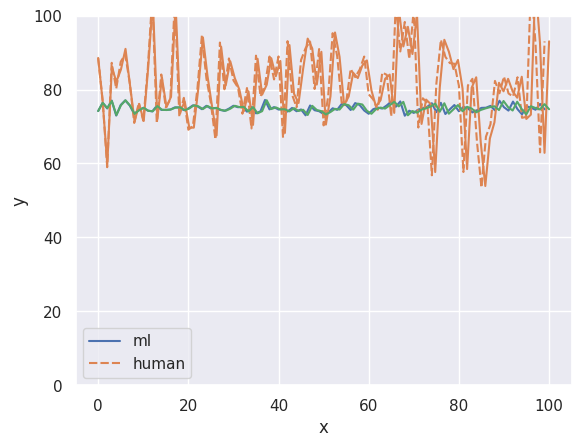

In [64]:
rng = np.random.default_rng()
xs = np.linspace(0, 100, 100)
human_mean = 80
human_data = human_mean + np.exp(-xs**2) + 10 * rng.standard_normal(100)
ml_mean = 75
ml_data = ml_mean + np.random.normal(0, 1, 100)
plt.ylim(0, 100)
df = pd.DataFrame(data={
	"ml": ml_data,
	"human": human_data
})
sns.lineplot(df)
human_spl = spline(xs, human_data)
ml_spl = spline(xs, ml_data, 0.5)
sns.lineplot(data=pd.DataFrame({"x": xs, "y": human_spl(xs)}), x="x", y="y")
sns.lineplot(data=pd.DataFrame({"x": xs, "y": ml_spl(xs)}), x="x", y="y")
human_spl.integral(0, 100)
ml_spl.integral(0, 100)
# sns.lineplot(human_data)
# sns.kdeplot(human_data, shade=True)
# sns.lineplot(ml_data)

In [30]:
spline(np.arange(100), ml_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])